# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salinopolis


Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | kerema
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | cadale
Processing Record 9 of Set 1 | chonchi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | bahia blanca
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | dedougou
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | sisimiut
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | praya
Processing Record 20 of Set 1 | jingzhou
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | grand gaube
Processing Record 23 of Set 1 | walvis bay
Processing Record 24 of Set 1 | edinburgh of the seven seas
Processing Record 25 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salinopolis,-0.6136,-47.3561,27.86,86,49,3.97,BR,1712946341
1,papatowai,-46.5619,169.4708,5.95,91,64,0.89,NZ,1712946622
2,inhambane,-23.8650,35.3833,22.02,74,88,3.32,MZ,1712946625
3,kerema,-7.9631,145.7785,25.90,87,100,2.07,PG,1712946628
4,bilibino,68.0546,166.4372,-12.08,79,100,0.81,RU,1712946631


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salinopolis,-0.6136,-47.3561,27.86,86,49,3.97,BR,1712946341
1,papatowai,-46.5619,169.4708,5.95,91,64,0.89,NZ,1712946622
2,inhambane,-23.8650,35.3833,22.02,74,88,3.32,MZ,1712946625
3,kerema,-7.9631,145.7785,25.90,87,100,2.07,PG,1712946628
4,bilibino,68.0546,166.4372,-12.08,79,100,0.81,RU,1712946631


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

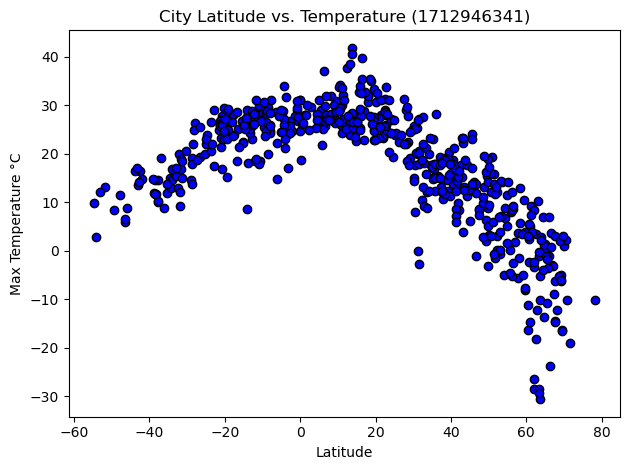

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'], marker='o',
            facecolors='b', edgecolors='k')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

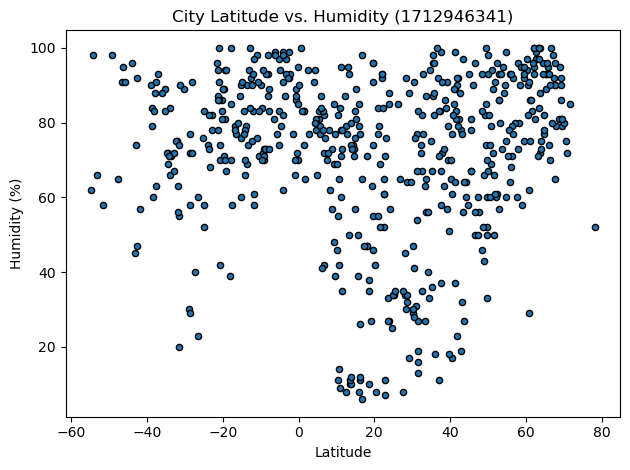

In [49]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',
                  x='Lat', y='Humidity',
                  marker='o',
                  facecolors='b', edgecolors='k',
                  title=f'City Latitude vs. Humidity ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

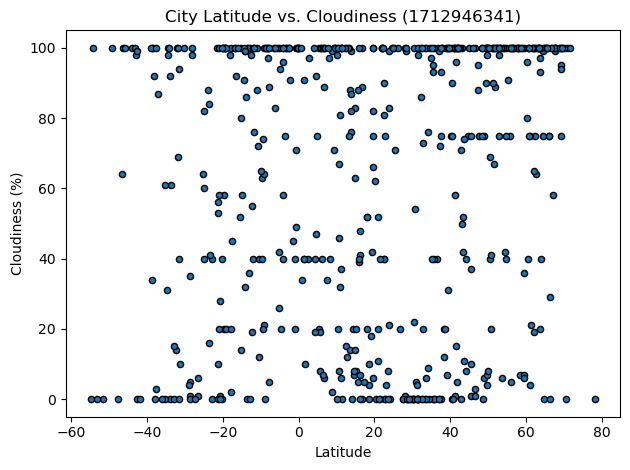

In [50]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',
                  x='Lat', y='Cloudiness',
                  marker='o',
                  facecolors='b', edgecolors='k',
                  title=f'City Latitude vs. Cloudiness ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

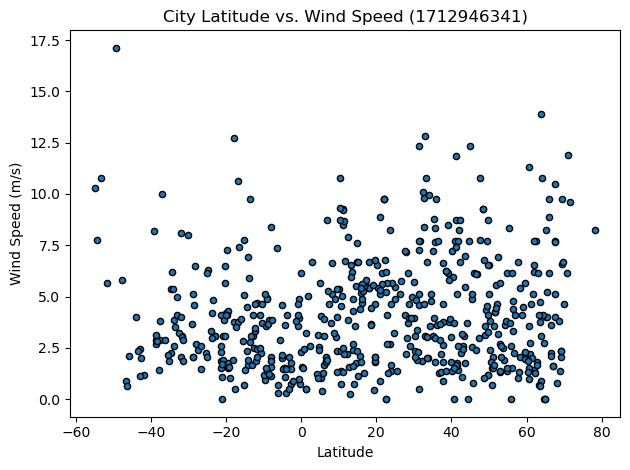

In [51]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',
                  x='Lat', y='Wind Speed',
                  marker='o',
                  facecolors='b', edgecolors='k',
                  title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bilibino,68.0546,166.4372,-12.08,79,100,0.81,RU,1712946631
5,nemuro,43.3236,145.5750,3.88,97,52,3.10,JP,1712946634
6,kodiak,57.7900,-152.4072,3.73,60,100,6.69,US,1712946636
7,cadale,2.7603,46.3222,29.63,77,97,6.70,SO,1712946639
13,ilulissat,69.2167,-51.1000,-4.99,86,75,2.06,GL,1712946657


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salinopolis,-0.6136,-47.3561,27.86,86,49,3.97,BR,1712946341
1,papatowai,-46.5619,169.4708,5.95,91,64,0.89,NZ,1712946622
2,inhambane,-23.8650,35.3833,22.02,74,88,3.32,MZ,1712946625
3,kerema,-7.9631,145.7785,25.90,87,100,2.07,PG,1712946628
8,chonchi,-42.6128,-73.8092,16.56,47,0,2.02,CL,1712946641


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.6x + 36.97
The r-value is: -0.8621925525974683


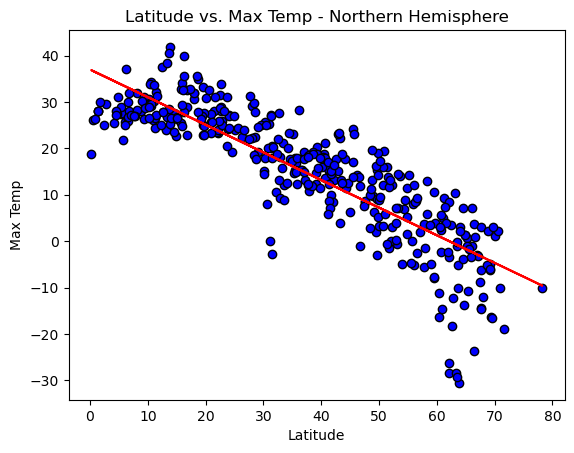

In [32]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Max Temp'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.38x + 29.64
The r-value is: 0.7824625134419734


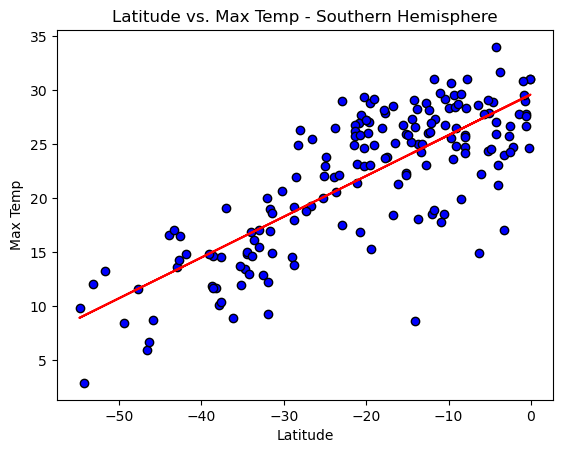

In [52]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Max Temp'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:**
There's a negative relationship in the Northern Hemisphere between Relationship and Latitude.
On the other hand, there's a positive relationship in the Soutern Hemisphere between Relationship and Latitude.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.38x + 54.87
The r-value is: 0.3126448809768076


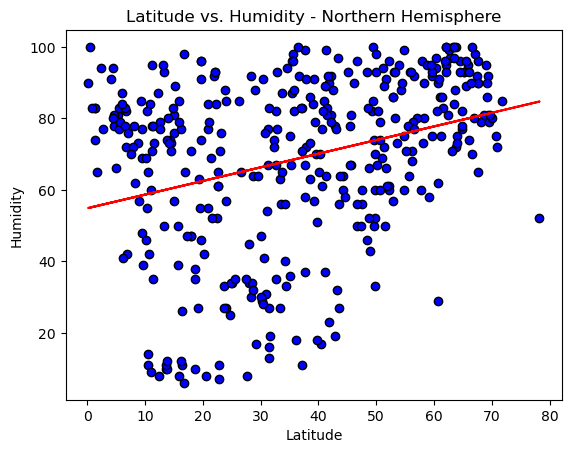

In [53]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y, name, vbl,hemi)
plt.show()

Linear equation: y = 0.29x + 84.19
The r-value is: 0.25528805872992916


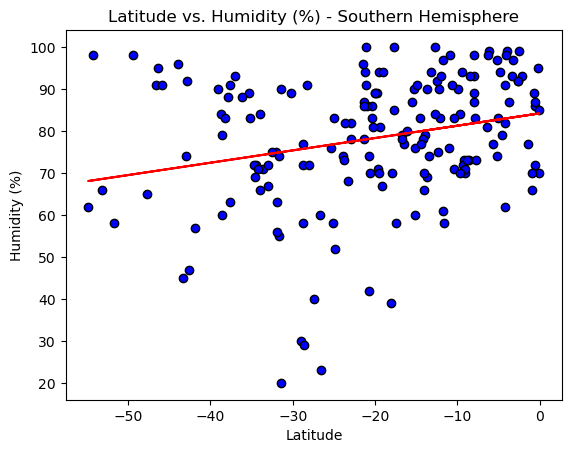

In [54]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
Both South and North have a postive relationship with Humidity and Latitude, but it seems weak because the Correlation Relatioship is 0.25 and 0.31.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.49x + 43.83
The r-value is: 0.24022204134804498


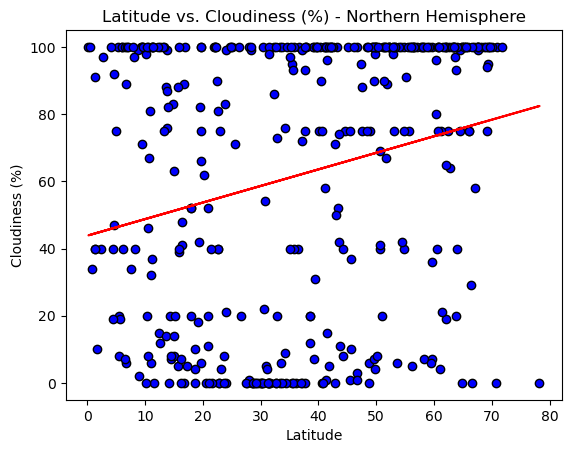

In [43]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.63x + 74.89
The r-value is: 0.21568713872775136


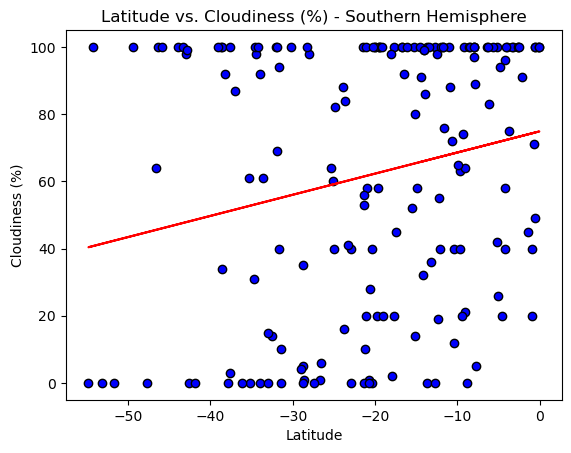

In [45]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
Both South and North have a postive relationship with Cloudiness and Latitude, but it seems weak because the Correlation Relatioship is 0.24 and 0.22.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 4.17
The r-value is: 0.03727770562197382


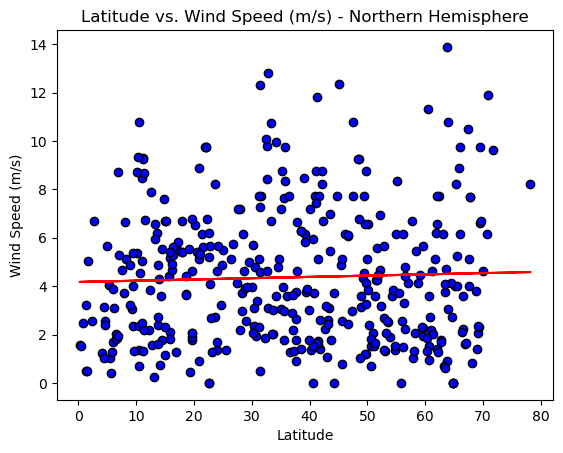

In [46]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.05x + 2.56
The r-value is: -0.25901578713392237


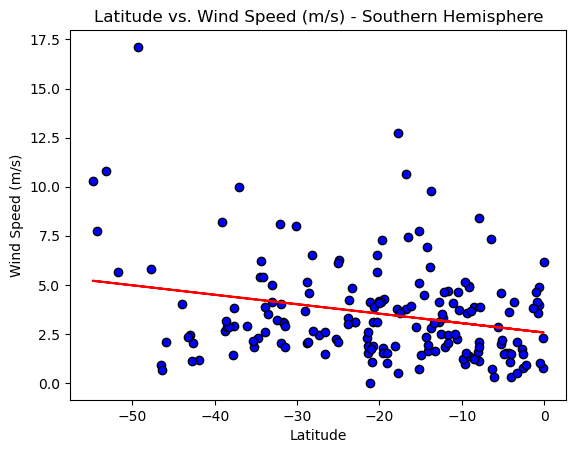

In [47]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 
North Hemisphere has a weak postive relationship to almost no relationship because the Correlation Relationship is 0.03.
On the other hand, the Southern Hemisphere has a weak negative relationship because the Correlation Relationship is -0.25.